#<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
#Test <a href=http://www.ramp.studio/events/iris_test>RAMP on iris</a> 

<i> Adapted for Chalab by Isabelle Guyon from original code of Balázs Kégl (LAL/CNRS)</i>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

## Introduction

The task of HIVA is to predict which compounds are active against the AIDS HIV infection. The dataset have two classes : active or inactive ( Binary Classification). The variables represent properties of the molecule inferred from its structure.

The problem is therefore to relate structure to activity (a QSAR=quantitative structure - activity relationship problem) to screen new compounds before actually testing them (a HTS=high - throughput screening problem)

In [1]:
codedir = 'sample_code/'                        # Change this to the directory where you put the code
from sys import path; path.append(codedir)
%matplotlib inline
import seaborn as sns; sns.set()

## Fetch the data and load it

In [2]:
datadir = 'public_data/'                        # Change this to the directory where you put the input data
dataname = 'hiva'
basename = datadir  + dataname
# !ls $basename*

In [3]:
import data_io
reload(data_io)
data = data_io.read_as_df(basename)                          # The data are loaded as a Pandas Data Frame
#data.to_csv(basename + '_train.csv', index=False)           # This allows saving the data in csv format

Reading public_data/hiva_train from AutoML format
Number of examples = 3845
Number of features = 1617
Number of classes = 2


In [5]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1609,feature_1610,feature_1611,feature_1612,feature_1613,feature_1614,feature_1615,feature_1616,feature_1617,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,negative
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,negative


In [5]:
data.describe() 

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1608,feature_1609,feature_1610,feature_1611,feature_1612,feature_1613,feature_1614,feature_1615,feature_1616,feature_1617
count,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,...,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000
mean,0.009623,0.022627,0.016905,0.035891,0.061638,0.118336,0.033030,0.008062,0.037191,0.017425,...,0.049935,0.132380,0.018986,0.080104,0.057997,0.072042,0.005982,0.056177,0.065280,0.067620
std,0.097636,0.148730,0.128933,0.186042,0.240529,0.323047,0.178738,0.089440,0.189255,0.130867,...,0.217839,0.338947,0.136492,0.271489,0.233769,0.258590,0.077120,0.230293,0.247051,0.251126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Features Variances

We're gonna plot the features variances to see if some feature are irreleavant(very low variance). You can use that to reduce the dimensionality of each line.

In [4]:
import numpy as np
X_train = data.drop('target', axis=1).values     
var_features = np.var(X_train, axis=0)
print var_features

[ 0.00953029  0.02211482  0.01661929 ...,  0.05302101  0.06101816
  0.06304778]


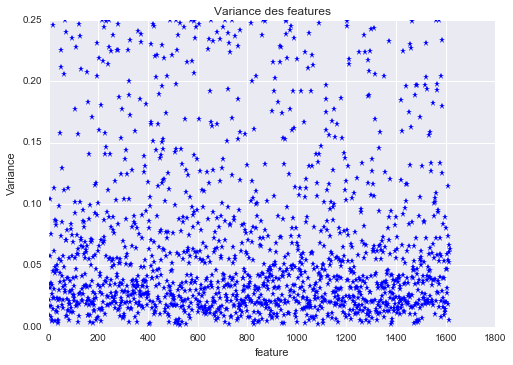

In [5]:
import matplotlib.pylab as plt

plt.plot(var_features, 'b*')
plt.ylabel("Variance")
plt.xlabel("feature")
plt.title("Variance des features")
plt.show()

In [6]:
# You can remove features with low variance by doing this : 

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.05))
X_train_modify = sel.fit_transform(X_train)

print "Shape before reudction : ", X_train.shape
print "Shape after reduction : ", X_train_modify.shape

Shape before reudction :  (3845L, 1617L)
Shape after reduction :  (3845L, 697L)


## Building a predictive model

Data matrices for training and making predictions.

In [8]:
X_train = data.drop('target', axis=1).values            # This is the data matrix you already loaded (training data)
y_train = data['target'].values                         # These are the target values encoded as categorical variables
print 'Dimensions X_train=', X_train.shape, 'y_train=', y_train.shape
X_test = data_io.read_as_df(basename, 'test')
X_valid = data_io.read_as_df(basename, 'valid')

Dimensions X_train= (3845L, 1617L) y_train= (3845L,)
Reading public_data/hiva_test from AutoML format
Number of examples = 38449
Number of features = 1617
Reading public_data/hiva_valid from AutoML format
Number of examples = 384
Number of features = 1617


The initial classifier in your starting kit (in the sample_code directory).

In [11]:
import classifier
reload(classifier)                               # If you make changes to your code you have to reload it
from classifier import Classifier
Classifier??

Train, run, and save your classifier and your predictions. If you saved a trained model and/or prediction results, the evaluation script will look for those and use those in priority [(1) use saved predictions; (2) if no predictions, use saved model, do not retrain, just test; (3) if neither, train and test model from scratch]. Compute the predictions with predict_proba, this is more versatile.

In [12]:
import pdb
result_dir = 'res/'
outname = result_dir + dataname
clf = Classifier()
clf.fit(X_train, y_train)
Y_valid = clf.predict_proba(X_valid)
Y_test = clf.predict_proba(X_test)
clf.save(outname)
#clf.load(outname) # Uncomment to check reloading works
data_io.write(outname + '_valid.predict', Y_valid)
data_io.write(outname + '_test.predict', Y_test)
# !ls $outname*

Feature ranking:
1. feature 166 (0.014127)
2. feature 184 (0.011324)
3. feature 330 (0.009641)
4. feature 1174 (0.007892)
5. feature 1324 (0.006689)
6. feature 1404 (0.006275)
7. feature 645 (0.006254)
8. feature 1048 (0.005996)
9. feature 824 (0.005963)
10. feature 450 (0.005328)


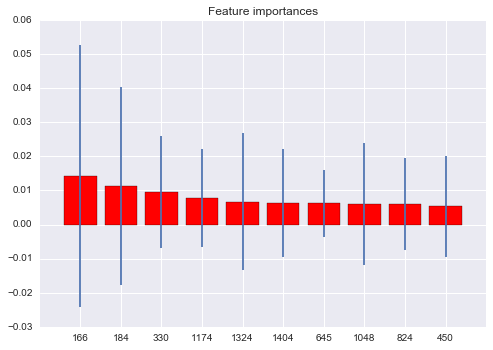

In [13]:
# Features importance plot
# To be more readble, we only plot the 10 most important features
import matplotlib.pylab as plt 
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
number_features = 10
indices = np.argsort(importances)[::-1][:number_features]

# Print the feature ranking
print("Feature ranking:")

for f in range(number_features):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(number_features), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(number_features), indices)
plt.xlim([-1, number_features])
plt.show()


Compute the training accuracy.

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Directly predicts the (categorical) class labels
y_predict = clf.predict(X_train)                   
print 'Training accuracy = ', accuracy_score(y_train, y_predict)
class_labels = clf.get_classes()     
print 'Class labels=', class_labels
print 'Confusion matrix [known in lines, predicted in columns]=\n',confusion_matrix(y_train, y_predict, class_labels)

Training accuracy =  0.995838751625
Class labels= ['negative' 'positive']
Confusion matrix [known in lines, predicted in columns]=
[[3709    1]
 [  15  120]]


Compute cross-validation accuracy. This is usually worse than the training accuracy. Notice that we internally split the training data into training and validation set (this is because we do NOT have the labels of X_valid and X_test).

In [15]:
from sklearn.cross_validation import StratifiedShuffleSplit
# This is just an example of 2-fold cross-validation
skf = StratifiedShuffleSplit(y_train, n_iter=2, test_size=0.5, random_state=61)
i=0
for idx_t, idx_v in skf:
    i=i+1
    Xtr = X_train[idx_t]
    Ytr = y_train[idx_t]
    Xva = X_train[idx_v]
    Yva = y_train[idx_v]
    clf = Classifier()
    clf.fit(Xtr, Ytr)
    Y_predict = clf.predict(Xva)
    print 'Fold', i, 'validation accuracy = ', accuracy_score(Y_predict, Yva)

D:\Program Files\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Fold 1 validation accuracy =  0.970358814353
Fold 2 validation accuracy =  0.967238689548


ADVANCED: Sklearn does not have multi-class metrics, this shows how libscore metrics work.

In [16]:
import libscores
 
# To evaluate results with multi-class metrics, the targets must be encoded as one vs. the rest
Y_train, C = libscores.onehot(y_train)                                   
print 'Dimensions Y_train=', Y_train.shape, 'Class labels=', C
assert((class_labels==C).all()) # Just to make sure the labels of the classifier are in the right order
# Note: if all went well, you should recover public_data/iris_train.solution
# You had it all along, but to show you some nice plots we loaded the data as a data frame so we lost it!

from libscores import bac_metric 
from libscores import pac_metric 
# Predicts probabilities, a matrix patnum x classnum 
# As solution, you must use Y_train, not y_train
y_predict_proba = clf.predict_proba(X_train)      
print 'Training balanced accuracy = ', bac_metric(Y_train, y_predict_proba, task='multiclass.classification')
print 'Training probabilistic accuracy = ', pac_metric(Y_train, y_predict_proba, task='multiclass.classification')

Dimensions Y_train= (3845L, 2L) Class labels= ['negative' 'positive']
Training balanced accuracy =  0.471917739842
Training probabilistic accuracy =  -0.89300889236


## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>classifier.py</code> in the <code>sample_code/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission.  The program looks for saved results and saved models in the subdirectory <code>res/</code>. If it finds them, it will use them: (1) If results are found, then are copied to the output directory; (2) If no results but a trained model is found, it is reloaded and no training occurs; (3) If nothing is found a fresh model is trained and tested.

In [17]:
outdir = '../outputs'         # If you use result_dir as output directory, your submission will include your results

In [38]:
!python run.py $datadir $outdir

Using input_dir: public_data/
Using output_dir: D:\Users\abdel\Google Drive\coursParisSud\Projet\outputs
************************************************************************
****** Attempting to copy files (from res/) for RESULT submission ******
************************************************************************
[+] Hiva copied
[+] Results copied to output directory, no model trained/tested
========= Zipping this directory to prepare for submit ==============
See: ../sample_submission_16-11-28-16-30.zip
[+] Done
[+] Overall time spent  6.21 sec ::  Overall time budget  0.00 sec


## Making your submission

The test program <code>run.py</code> prepares your <code>zip</code> file, ready to go. You find it in the directory above where you ran your program. For large datasets, we recommend that <b><span style="color:red">you do NOT bundle the data with your submission</span></b>. The data directory is passed as an argument to run.py, and it is already there on the test server.